In this notebook we want to try to use a Neural Network to predict the correct party

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nlp = spacy.load("de_dep_news_trf")

In [2]:
data = pd.DataFrame(columns=['tweet', 'party'])

afd = pd.read_csv('../cleaned-data/AfD.csv')['text']
afd = pd.DataFrame([[i, 0] for i in afd], columns=['tweet', 'party'])

data = data.append(afd, ignore_index=True)

cdu = pd.read_csv('../cleaned-data/CDU.csv')['text']
csu = pd.read_csv('../cleaned-data/CSU.csv')['text']

cdu = pd.DataFrame([[i, 1] for i in cdu], columns=['tweet', 'party'])
csu = pd.DataFrame([[i, 1] for i in csu], columns=['tweet', 'party'])

data = data.append(cdu, ignore_index=True)
data = data.append(csu, ignore_index=True)

fdp = pd.read_csv('../cleaned-data/FDP.csv')['text']
fdp = pd.DataFrame([[i, 2] for i in fdp], columns=['tweet', 'party'])

data = data.append(fdp, ignore_index=True)

gru = pd.read_csv('../cleaned-data/GRÜNE.csv')['text']
gru = pd.DataFrame([[i, 3] for i in gru], columns=['tweet', 'party'])

data = data.append(gru, ignore_index=True)

lin = pd.read_csv('../cleaned-data/LINKE.csv')['text']
lin = pd.DataFrame([[i, 4] for i in lin], columns=['tweet', 'party'])

data = data.append(lin, ignore_index=True)

spd = pd.read_csv('../cleaned-data/GRÜNE.csv')['text']
spd = pd.DataFrame([[i, 5] for i in spd], columns=['tweet', 'party'])

data = data.append(spd, ignore_index=True)

data = data.dropna()
data

,tweet,party
0,Teenie auf dem Weg nach Malle Nein Aussenminis...,0
1,Heute Abend bin ich gemeinsam mit user zu Gast...,0
2,Berlin 17 Grad Die Frisur passt Unsere Motivat...,0
3,Lieber user lieber user ich gratuliere Ihnen h...,0
4,Seit gestern koennen die Mitglieder unserer Af...,0
...,...,...
307010,Wir muessen dringend darueber reden wie wir Vo...,5
307011,13 fuer Rassisten Jetzt raecht sich auch dass ...,5
307012,Manche meine AfD im Bundestag waere Normalisie...,5
307013,Uebel mir schauderst 13 fuer eine rassistische...,5


In [47]:
# Took ~12h
X = [nlp(tweet)._.trf_data.tensors[-1][0] for tweet in data['tweet'].to_numpy()] 

In [3]:
# load the vector representation (768d)
X = np.loadtxt('test.out', delimiter=',')
# load lable matrix
y = to_categorical(data['party'].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4)

In [24]:
model = Sequential()
model.add(Dense(384, input_dim=768, activation='relu'))
# model.add(Dense(512, input_dim=512, activation='relu'))
# model.add(Dense(256, input_dim=512, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, y_train, epochs=150, batch_size=512, verbose=1,
                validation_data=(X_val, y_val));

Epoch 1/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3447 - accuracy: 0.4566 - val_loss: 0.3996 - val_accuracy: 0.3656
Epoch 2/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3450 - accuracy: 0.4562 - val_loss: 0.4047 - val_accuracy: 0.3650
Epoch 3/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3443 - accuracy: 0.4572 - val_loss: 0.4002 - val_accuracy: 0.3660
Epoch 4/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3444 - accuracy: 0.4578 - val_loss: 0.3986 - val_accuracy: 0.3700
Epoch 5/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3444 - accuracy: 0.4572 - val_loss: 0.4007 - val_accuracy: 0.3647
Epoch 6/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3441 - accuracy: 0.4579 - val_loss: 0.4012 - val_accuracy: 0.3685
Epoch 7/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3434 - accuracy: 0.4601 - val_loss: 0.4013 - val_accuracy: 0.3669

Epoch 58/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3334 - accuracy: 0.4772 - val_loss: 0.4109 - val_accuracy: 0.3648
Epoch 59/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3341 - accuracy: 0.4764 - val_loss: 0.4092 - val_accuracy: 0.3689
Epoch 60/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3336 - accuracy: 0.4764 - val_loss: 0.4106 - val_accuracy: 0.3679
Epoch 61/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.4774 - val_loss: 0.4088 - val_accuracy: 0.3655
Epoch 62/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3331 - accuracy: 0.4773 - val_loss: 0.4118 - val_accuracy: 0.3699
Epoch 63/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.4772 - val_loss: 0.4095 - val_accuracy: 0.3675
Epoch 64/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.4774 - val_loss: 0.4100 - val_accuracy:

Epoch 115/150
416/416 [==============================] - 2s 4ms/step - loss: 0.3259 - accuracy: 0.4892 - val_loss: 0.4182 - val_accuracy: 0.3667
Epoch 116/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3258 - accuracy: 0.4898 - val_loss: 0.4188 - val_accuracy: 0.3607
Epoch 117/150
416/416 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.4903 - val_loss: 0.4201 - val_accuracy: 0.3631
Epoch 118/150
416/416 [==============================] - 2s 4ms/step - loss: 0.3258 - accuracy: 0.4894 - val_loss: 0.4225 - val_accuracy: 0.3614
Epoch 119/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3253 - accuracy: 0.4917 - val_loss: 0.4201 - val_accuracy: 0.3662
Epoch 120/150
416/416 [==============================] - 2s 5ms/step - loss: 0.3251 - accuracy: 0.4912 - val_loss: 0.4208 - val_accuracy: 0.3657
Epoch 121/150
416/416 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.4917 - val_loss: 0.4193 - val_ac

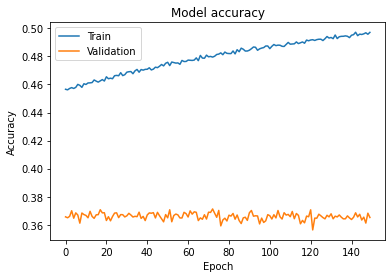

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

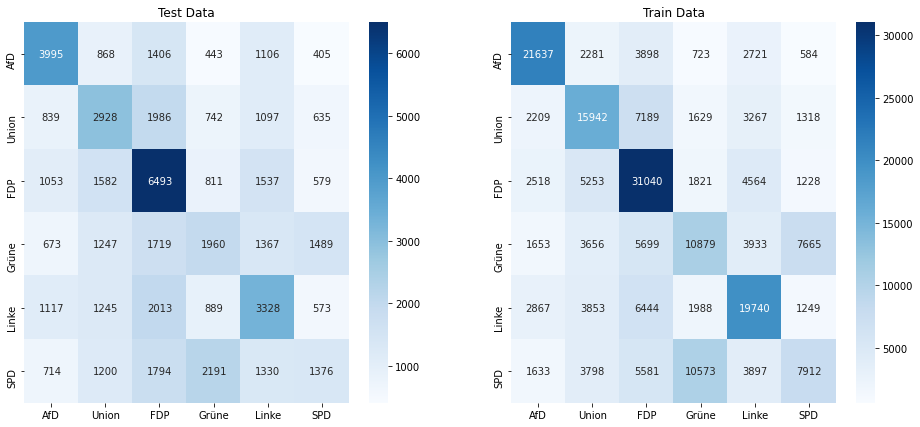

Party: 	 Test 	 Train
Afd:	 8223 	 31844
Union:	 8227 	 31554
FDP:	 12055 	 46424
Grüne:	 8455 	 33485
Linke:	 9165 	 36141
SPD:	 8605 	 33394

Acc:	 36.69% 50.34%


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))
# Block to evaluate training data
yhat_test = model.predict(X_test)
yhat_test = np.argmax(yhat_test, axis=1)

y_label_test = np.argmax(y_test, axis=1)

mat = confusion_matrix(y_label_test, yhat_test)
df = pd.DataFrame(mat, index = ["AfD", "Union", "FDP", "Grüne", "Linke", "SPD"],
                  columns = ["AfD", "Union", "FDP", "Grüne", "Linke", "SPD"])
# ax1.figure(figsize = (7,5))
sn.heatmap(df, annot=True ,cmap='Blues', fmt='g', ax=axes[0]).set_title('Test Data');
# ax1.show()

# Block to evaluate test data
yhat_train = model.predict(X_train)
yhat_train = np.argmax(yhat_train, axis=1)

y_label_train = np.argmax(y_train, axis=1)

mat = confusion_matrix(y_label_train, yhat_train)
df = pd.DataFrame(mat, index = ["AfD", "Union", "FDP", "Grüne", "Linke", "SPD"],
                  columns = ["AfD", "Union", "FDP", "Grüne", "Linke", "SPD"])
# ax2.figure(figsize = (7,5))
sn.heatmap(df, annot=True ,cmap='Blues', fmt='g', ax=axes[1]).set_title('Train Data');
plt.show()
print('Party: \t Test \t Train\nAfd:\t',sum(y_label_test == 0), "\t" , sum(y_label_train == 0))
print('Union:\t',sum(y_label_test == 1), "\t" , sum(y_label_train == 1))
print('FDP:\t',sum(y_label_test == 2), "\t" , sum(y_label_train == 2))
print('Grüne:\t',sum(y_label_test == 3), "\t" , sum(y_label_train == 3))
print('Linke:\t',sum(y_label_test == 4), "\t" , sum(y_label_train == 4))
print('SPD:\t',sum(y_label_test == 5), "\t" , sum(y_label_train == 5))
print('\nAcc:\t', "{:2.2f}%".format(accuracy_score(y_label_test,yhat_test)*100), "{:2.2f}%".format(accuracy_score(y_label_train,yhat_train)*100))

In [49]:
tweet = "In dem die Regierende user von x Lobbyisten bestochen wurde, werden Menschen die vor solchen Fällen warnten bei Demos auf Geheiß des Establishments zusammengeschlagen, diskriminiert & vom Geheimdienst bespitzelt. Nein zur #Impfung von #Kindern!"
afd = nlp(tweet)._.trf_data.tensors[-1][0]

tweet = "Herzlichen Glückwunsch an die neue Regierung von Israel und an meinen neuen Kollegen user. Mazel tov! Freue mich auf die Zusammenarbeit! Deutschland wird immer an der Seite Israels stehen. Und herzlichen Dank, user, für Deine großartige Arbeit und Freundschaft!"

spd = nlp(tweet)._.trf_data.tensors[-1][0]

model.predict([[0]*768,afd,spd])



array([[2.20974684e-01, 1.81075782e-01, 1.74682930e-01, 1.10911034e-01,
        1.95371464e-01, 1.16984129e-01],
       [9.98898268e-01, 9.58590135e-07, 1.62633862e-09, 1.74325665e-09,
        1.10076554e-03, 1.88432381e-09],
       [8.46247374e-08, 4.96473489e-03, 2.11778570e-05, 4.97822851e-01,
        3.71695904e-04, 4.96819496e-01]], dtype=float32)